# Title
### Group 11 Project Proposal
##### Group Members: 
Jialu Jin   24403594
<br>Aditya Goel
<br>Yirui Wang 27719509
<br>Aaron Cui 94952777

# Introduction


# Preliminary Results

In [1]:
library(infer)
library(repr)
library(tidyverse)
library(readxl)
library(digest)
library(dplyr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipe

In [2]:
grade <- read.csv("student-mat.csv", header=T, sep=";")
head(grade)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


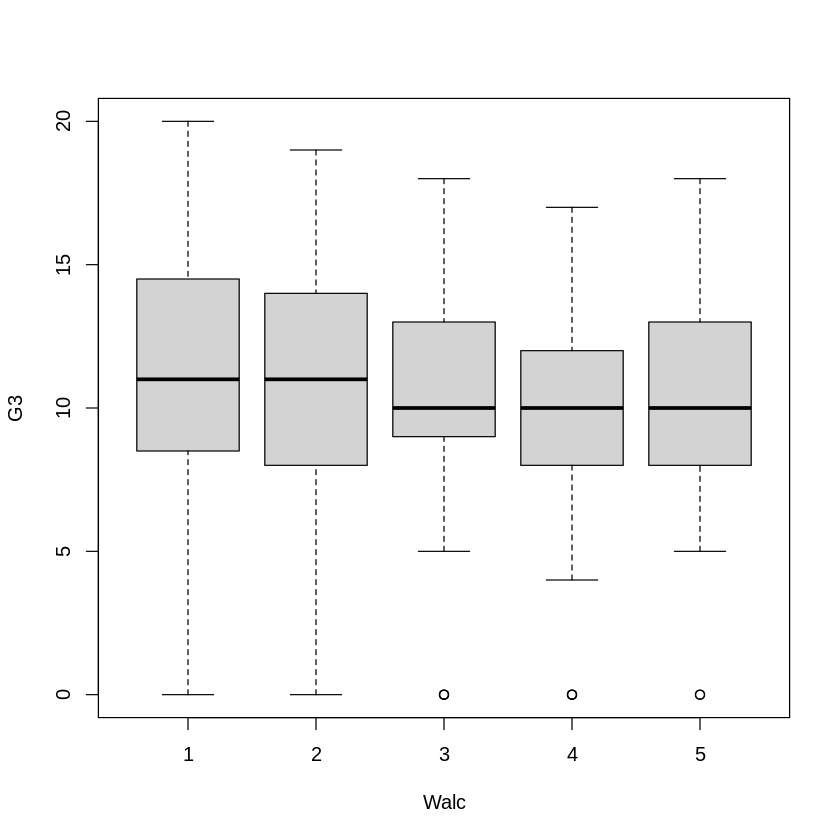

In [3]:
boxplot(G3 ~ Walc, data = grade)

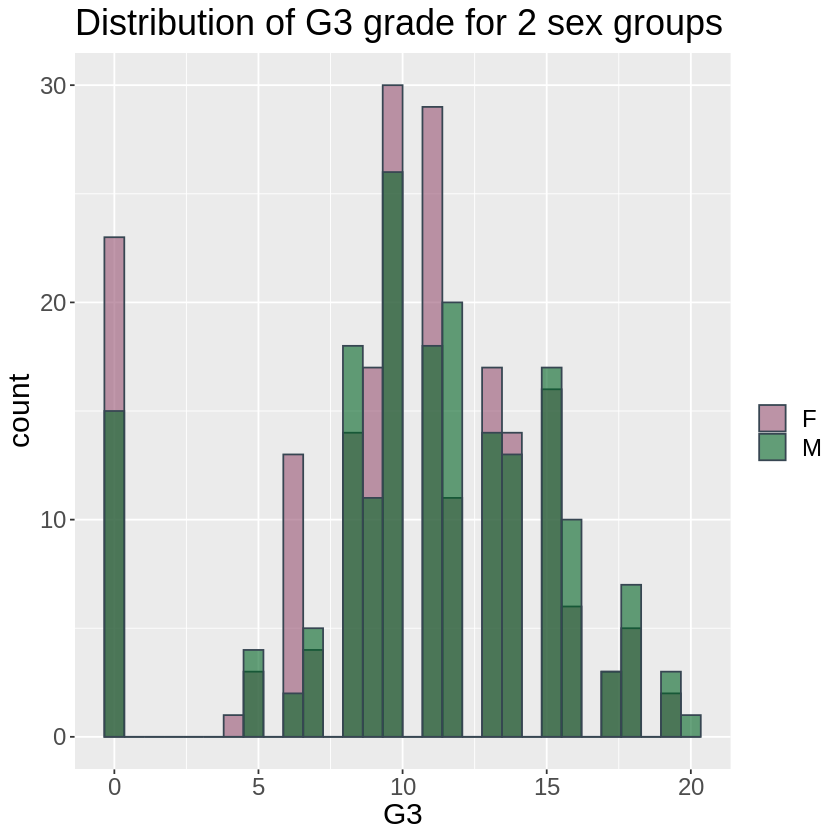

In [4]:
histogram <- grade %>%
    ggplot(aes(x = G3, fill = sex)) +
    geom_histogram(bins=30, color="#374652", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#985473", "#036425")) +
    ggtitle("Distribution of G3 grade for 2 sex groups")+
    labs(fill="") +
    theme(text = element_text(size = 18))
histogram

In [5]:
Suicide_p <- read.csv("master.csv", header=T)
head(Suicide_p)

,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


In [6]:
suicide_sample <- Suicide_p %>%
                  group_by(country) %>%
                  filter(country %in% c("Canada", "Brazil", "Sweden", "United States", "Germany", "Ireland")) %>%
                  select(country,suicides.100k.pop, HDI.for.year)
suicide_sample

country,suicides.100k.pop,HDI.for.year
<chr>,<dbl>,<dbl>
Brazil,15.35,0.576
Brazil,9.97,0.576
Brazil,8.43,0.576
⋮,⋮,⋮
United States,4.58,NA
United States,1.20,NA
United States,0.78,NA


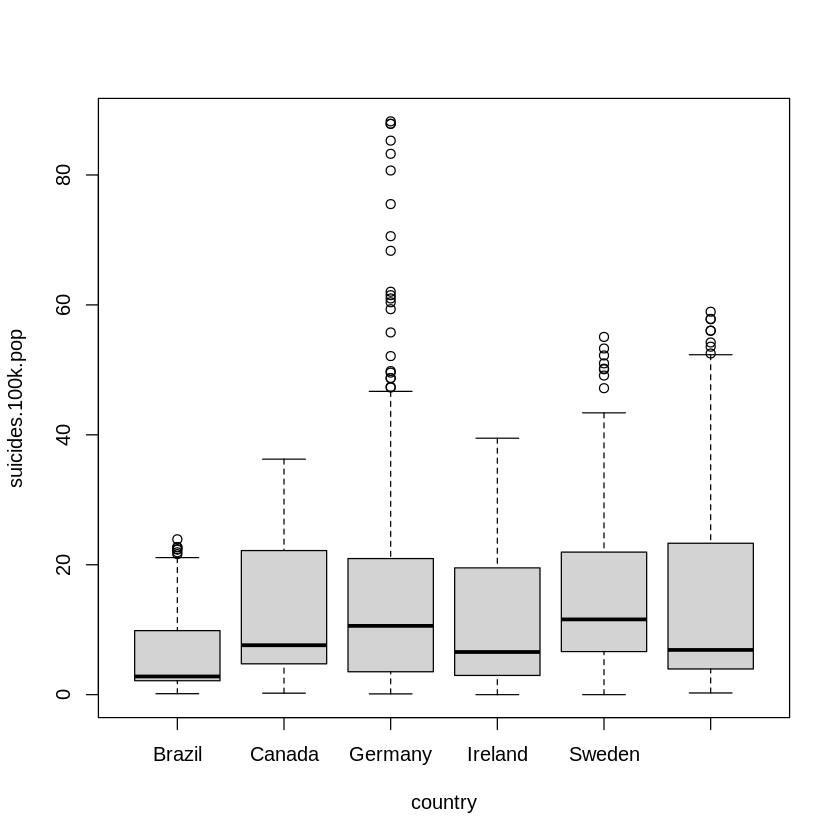

In [7]:
boxplot(suicides.100k.pop ~ country, data = suicide_sample)

In [8]:
suicide_year <- Suicide_p %>%
                  group_by(country) %>%
                  filter(year %in% c("1985", "1995", "2005")) %>%
                  select(country, year,suicides.100k.pop, HDI.for.year)
suicide_year

country,year,suicides.100k.pop,HDI.for.year
<chr>,<int>,<dbl>,<dbl>
Albania,1995,5.58,0.619
Albania,1995,5.06,0.619
Albania,1995,4.90,0.619
⋮,⋮,⋮,⋮
Uzbekistan,2005,2.34,0.625
Uzbekistan,2005,0.97,0.625
Uzbekistan,2005,0.34,0.625


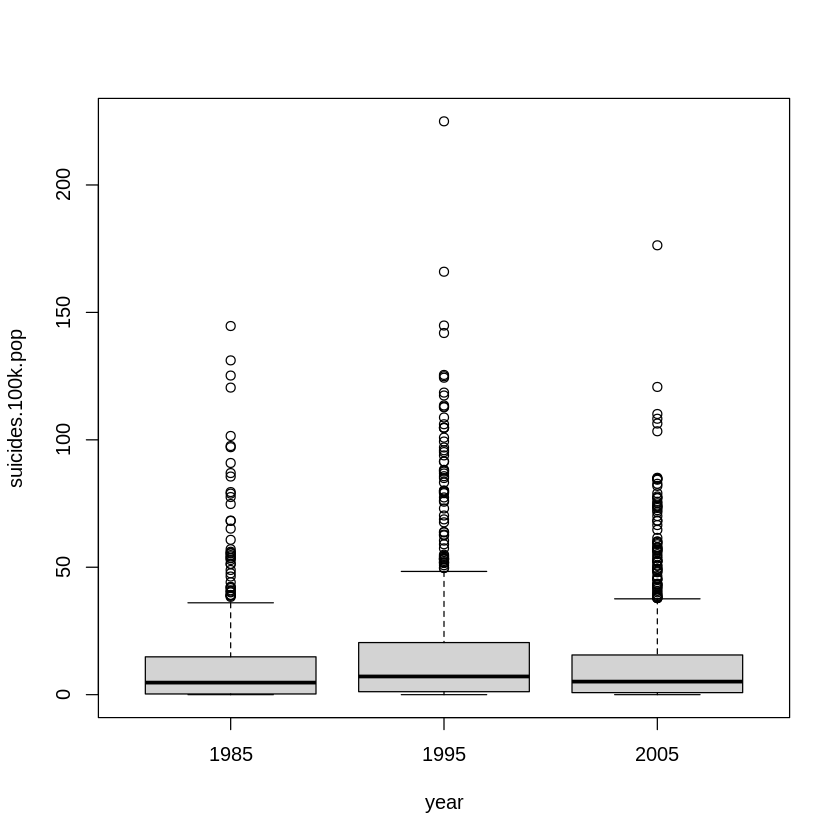

In [9]:
boxplot(suicides.100k.pop ~ year, data = suicide_year)

In [10]:
suicide_sex <- Suicide_p %>%
                  group_by(country) %>%
                  #filter(year %in% c("1985", "1995", "2005")) %>%
                  select(country, sex,suicides.100k.pop)
suicide_sex

country,sex,suicides.100k.pop
<chr>,<chr>,<dbl>
Albania,male,6.71
Albania,male,5.19
Albania,female,4.83
⋮,⋮,⋮
Uzbekistan,male,2.17
Uzbekistan,female,1.67
Uzbekistan,female,1.46


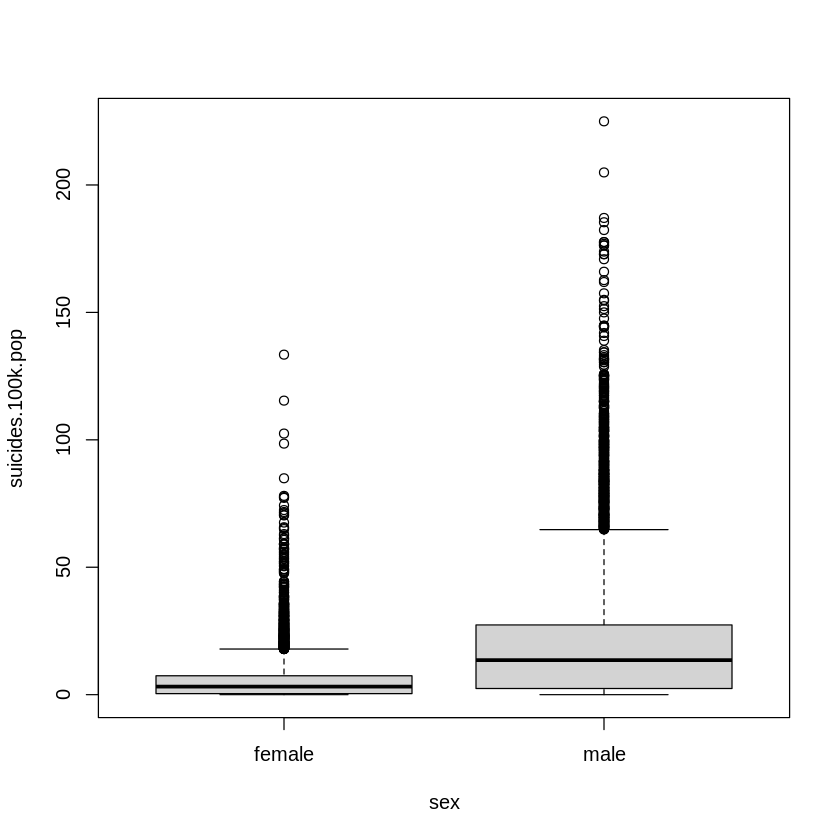

In [11]:
boxplot(suicides.100k.pop ~ sex, data = suicide_sex)

In [12]:
suicide_generation <- Suicide_p %>%
                  group_by(country) %>%
                  #filter(year %in% c("1985", "1995", "2005")) %>%
                  select(country, generation, suicides.100k.pop)
suicide_generation

country,generation,suicides.100k.pop
<chr>,<chr>,<dbl>
Albania,Generation X,6.71
Albania,Silent,5.19
Albania,Generation X,4.83
⋮,⋮,⋮
Uzbekistan,Generation Z,2.17
Uzbekistan,Generation Z,1.67
Uzbekistan,Boomers,1.46


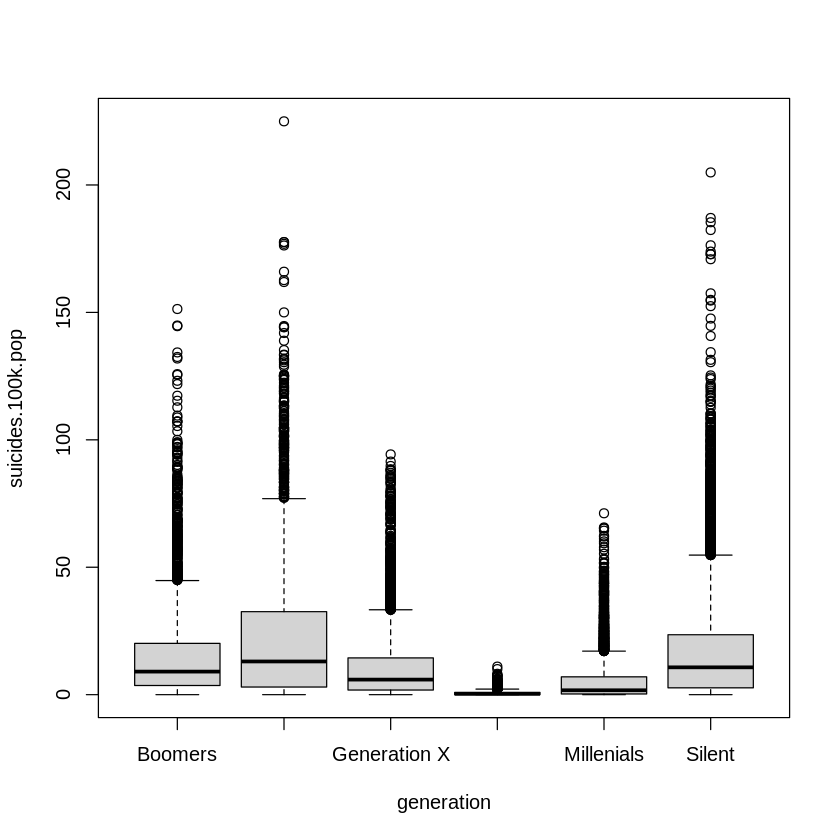

In [13]:
boxplot(suicides.100k.pop ~ generation, data = suicide_generation)

In [14]:
covid_liver <- read.csv("covid-liver.csv", header=T)
head(covid_liver)

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,⋯,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>
1,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22,⋯,Y,Consistent,US,0.47,NA,0,0.7,NA,Y,7.333333
2,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40,⋯,Y,Consistent,US,NA,NA,2,NA,NA,Y,4.033333
3,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52,⋯,Y,Consistent,US,NA,NA,0,NA,NA,Y,5.900000
4,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80,⋯,N,NA,NA,NA,NA,2,NA,NA,Y,NA
5,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60,⋯,N,NA,NA,NA,NA,0,NA,NA,Y,NA
6,Y,Prepandemic,1,N,Incidental,70,M,NAFLD,Y,24,⋯,Y,Consistent,NA,NA,NA,2,NA,NA,Y,3.000000


In [15]:
covid <- covid_liver %>%
                  group_by(Year) %>%
                  #filter(Year) %>%
                  select(Year, Surveillance_effectiveness, Cancer, Size)
covid

Year,Surveillance_effectiveness,Cancer,Size
<chr>,<chr>,<chr>,<int>
Prepandemic,Consistent,Y,22
Prepandemic,Consistent,Y,40
Prepandemic,Consistent,Y,52
⋮,⋮,⋮,⋮
Pandemic,NA,N,63
Pandemic,NA,N,65
Pandemic,NA,N,45


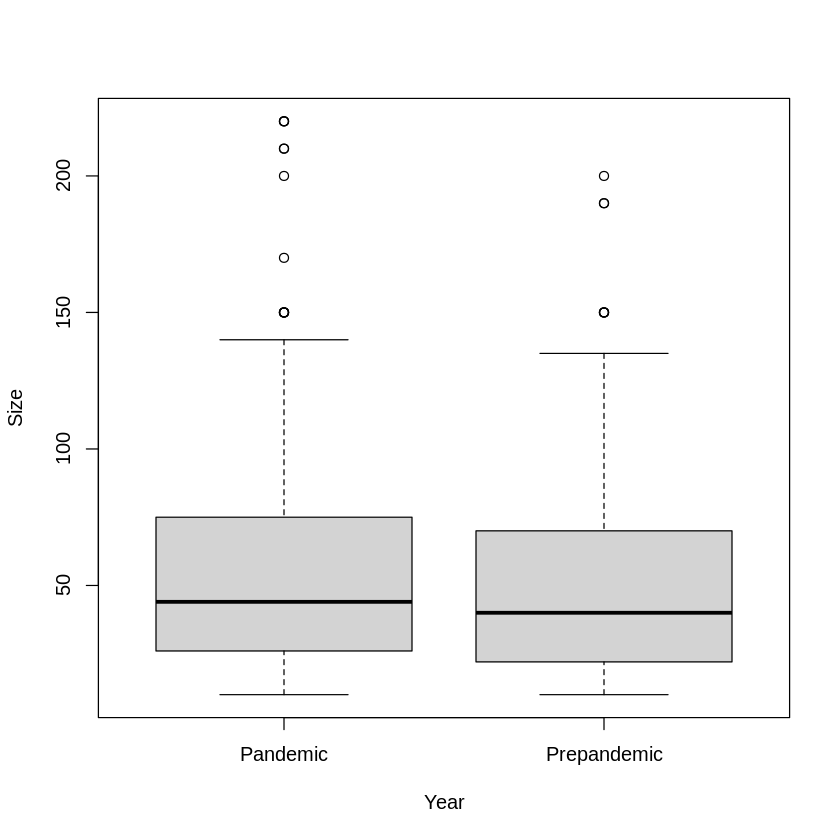

In [16]:
boxplot(Size ~ Year, data = covid)

In [17]:
crime_2021 <- read.csv("crimedata_csv_2021.csv", header=T)
head(crime_2021)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9,5459166
2,Break and Enter Commercial,2021,11,26,13,58,10XX BARCLAY ST,West End,490833.8,5458887
3,Break and Enter Commercial,2021,12,14,2,2,10XX BEACH AVE,Central Business District,490252.4,5458163
4,Break and Enter Commercial,2021,7,17,5,0,10XX BEACH AVE,Central Business District,490255.4,5458159
5,Break and Enter Commercial,2021,6,15,4,0,10XX BEACH AVE,Central Business District,490258.4,5458155
6,Break and Enter Commercial,2021,7,23,6,12,10XX BEACH AVE,Central Business District,490269.9,5458141


In [31]:
crime <- crime_2021 %>%
                  group_by(MONTH, NEIGHBOURHOOD) %>%
                  # filter(MONTH %in% c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                  #       NEIGHBOURHOOD %in% c("Central Business District", "West End")) %>%
                  select(NEIGHBOURHOOD, MONTH)
crime

NEIGHBOURHOOD,MONTH
<chr>,<int>
West End,11
West End,11
Central Business District,12
⋮,⋮
Kitsilano,7
Marpole,3
Marpole,4


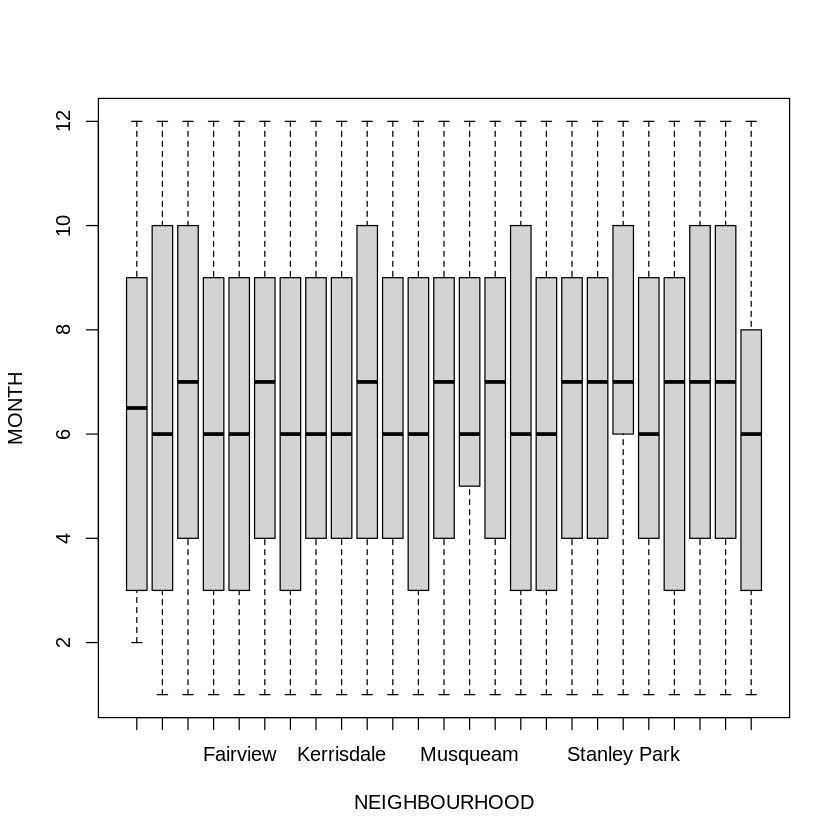

In [32]:
boxplot(MONTH ~ NEIGHBOURHOOD, data = crime)

In [33]:
Death <- read.csv("Number of Deaths by Risk Factors.csv", header=T)
head(Death)

,Entity,Code,Year,Outdoor.air.pollution,High.systolic.blood.pressure,Diet.high.in.sodium,Diet.low.in.whole.grains,Alcohol.use,Diet.low.in.fruits,Unsafe.water.source,⋯,High.body.mass.index,Unsafe.sanitation,No.access.to.handwashing.facility,Drug.use...Sex..Both...Age..All.Ages..Number.,Low.bone.mineral.density,Vitamin.A.deficiency,Child.stunting,Discontinued.breastfeeding,Non.exclusive.breastfeeding,Iron.deficiency
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,⋯,9518,2798,4825,174,389,2016,7686,107,2216,564
2,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,⋯,9489,3254,5127,188,389,2056,7886,121,2501,611
3,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,⋯,9528,4042,5889,211,393,2100,8568,150,3053,700
4,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,⋯,9611,5392,7007,232,411,2316,9875,204,3726,773
5,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,⋯,9675,5418,7421,247,413,2665,11031,204,3833,812
6,Afghanistan,AFG,1995,3869,28090,1154,7807,406,3703,8378,⋯,9608,6313,7896,260,417,3070,11973,233,4124,848


In [45]:
death_sample <- Death %>%
                  group_by(Entity) %>%
                  filter(Entity %in% c("Australia", "Canada")) %>%
                  select(Entity, Outdoor.air.pollution)
death_sample

Entity,Outdoor.air.pollution
<chr>,<int>
Australia,2415
Australia,2351
Australia,2342
⋮,⋮
Canada,4138
Canada,4397
Canada,4393


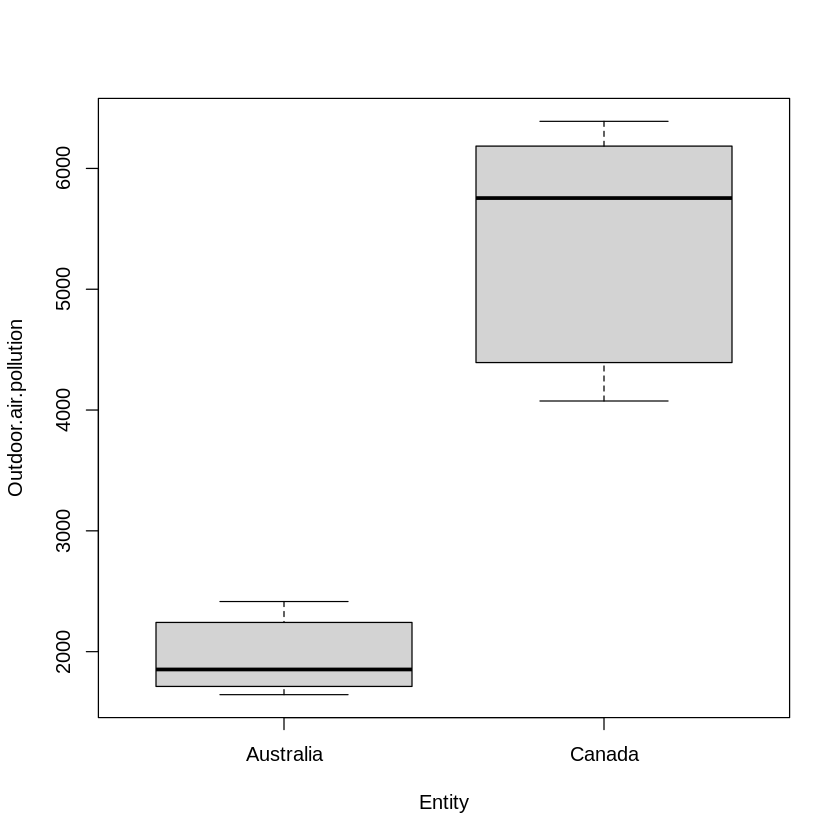

In [46]:
boxplot(Outdoor.air.pollution ~ Entity, data = death_sample)

# Methods: Plan

# References

https://www.kaggle.com/datasets/ahmadjalalmasood123/deaths-by-risk-factor-dataset